In [1]:
import pandas as pd
import numpy as np
from arch.unitroot import DFGLS
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

In [54]:
df = pd.read_stata("Precios_y_Dinero_data.dta")
df


,mmyy,ipc,m,m_en_ars
0,Jan-03,100.00,100.00,29609.92
1,Feb-03,100.57,99.36,29420.37
2,Mar-03,101.16,102.63,30388.08
3,Apr-03,101.21,104.26,30870.99
4,May-03,100.82,111.80,33105.17
...,...,...,...,...
180,Jan-18,1855.46,3467.35,1026680.19
181,Feb-18,1900.35,3474.21,1028710.45
182,Mar-18,1944.83,3451.86,1022093.87
183,Apr-18,1998.10,3443.90,1019734.89


In [7]:
df["obs"] = np.arange(1, len(df) + 1)


In [8]:
df

,mmyy,ipc,m,m_en_ars,obs
0,Jan-03,100.00,100.00,29609.92,1
1,Feb-03,100.57,99.36,29420.37,2
2,Mar-03,101.16,102.63,30388.08,3
3,Apr-03,101.21,104.26,30870.99,4
4,May-03,100.82,111.80,33105.17,5
...,...,...,...,...,...
180,Jan-18,1855.46,3467.35,1026680.19,181
181,Feb-18,1900.35,3474.21,1028710.45,182
182,Mar-18,1944.83,3451.86,1022093.87,183
183,Apr-18,1998.10,3443.90,1019734.89,184


In [10]:
df = df.set_index("mmyy")

In [16]:
### Pasamos los valores a numéricos
df["ipc"] = pd.to_numeric(df["ipc"], errors="coerce")
df["m"] = pd.to_numeric(df["m"], errors="coerce")
df["infl"] = df["ipc"].pct_change()
# Crecimiento de la base monetaria
df["crec_m"] = df["m"].pct_change()

In [17]:
df

,ipc,m,m_en_ars,obs,crec_m,infl
mmyy,,,,,,
Jan-03,100.00,100.00,29609.92,1,NaN,NaN
Feb-03,100.57,99.36,29420.37,2,-0.006400,0.005700
Mar-03,101.16,102.63,30388.08,3,0.032911,0.005867
Apr-03,101.21,104.26,30870.99,4,0.015882,0.000494
May-03,100.82,111.80,33105.17,5,0.072319,-0.003853
...,...,...,...,...,...,...
Jan-18,1855.46,3467.35,1026680.19,181,0.044798,0.017571
Feb-18,1900.35,3474.21,1028710.45,182,0.001978,0.024193
Mar-18,1944.83,3451.86,1022093.87,183,-0.006433,0.023406


### Veo que con logaritmo es lo mismo

In [19]:
df["infl_2"] = np.log(df["ipc"]).diff()
# Crecimiento de la base monetaria
df["crec_m_2"] = np.log(df["m"]).diff()


,ipc,m,m_en_ars,obs,crec_m,infl,infl_2,crec_m_2
mmyy,,,,,,,,
Jan-03,100.00,100.00,29609.92,1,NaN,NaN,NaN,NaN
Feb-03,100.57,99.36,29420.37,2,-0.006400,0.005700,0.005684,-0.006421
Mar-03,101.16,102.63,30388.08,3,0.032911,0.005867,0.005849,0.032381
Apr-03,101.21,104.26,30870.99,4,0.015882,0.000494,0.000494,0.015757
May-03,100.82,111.80,33105.17,5,0.072319,-0.003853,-0.003861,0.069824
...,...,...,...,...,...,...,...,...
Jan-18,1855.46,3467.35,1026680.19,181,0.044798,0.017571,0.017419,0.043823
Feb-18,1900.35,3474.21,1028710.45,182,0.001978,0.024193,0.023905,0.001977
Mar-18,1944.83,3451.86,1022093.87,183,-0.006433,0.023406,0.023136,-0.006454


### Ahora vemos estacionareidad

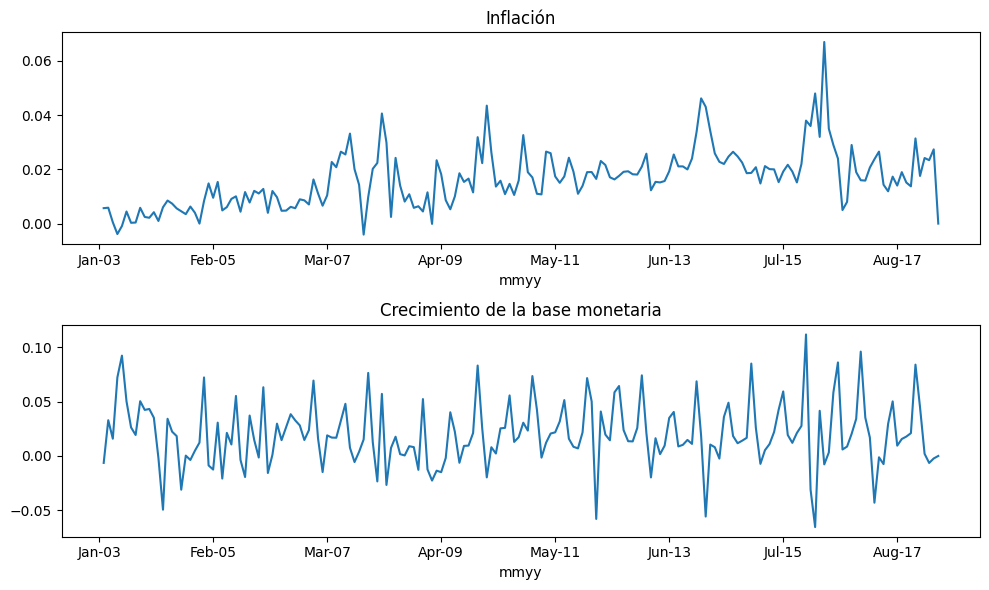

DFGLS Inflación:
       Dickey-Fuller GLS Results      
Test Statistic                 -3.295
P-value                         0.001
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -2.68 (1%), -2.06 (5%), -1.74 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
DFGLS Crecimiento M:
       Dickey-Fuller GLS Results      
Test Statistic                 -1.174
P-value                         0.227
Lags                               14
-------------------------------------

Trend: Constant
Critical Values: -2.68 (1%), -2.06 (5%), -1.75 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [21]:
##Ploteamos la series
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
df["infl"].plot(ax=ax[0], title="Inflación")
df["crec_m"].plot(ax=ax[1], title="Crecimiento de la base monetaria")
plt.tight_layout()
plt.show() 

print("DFGLS Inflación:\n", DFGLS(df["infl"].dropna()).summary())
print("DFGLS Crecimiento M:\n", DFGLS(df["crec_m"].dropna()).summary())

### Estimamos el VAR

## Inflacion regresada contra las dos variables, infl, y crec_m

In [4]:
# Selección de variables
data = df[["infl", "crec_m"]].dropna()  # Es bivariado porque tiene dos variables

# VAR(2)
model=VAR(data)
var2_1 = model.fit(maxlags=2)
print(var2_1.summary())

NameError: name 'df' is not defined

### Interpretación:

La inflación depende fuertemente de sus propios rezagos:

El coeficiente en L1.infl (0.52) es positivo y significativo (p < 0.01). → La inflación pasada explica gran parte de la inflación actual.

También L2.infl (0.21) es significativo.

Los rezagos del crecimiento monetario (crec_m) no son significativos (p > 0.3). → No parece haber efecto directo de la política monetaria de corto plazo sobre la inflación en este horizonte.

### crec_m regresada contra crec_m e inflacion

In [ ]:
# Selección de variables
data = df[["crec_m","infl",]].dropna()  # Es bivariado porque tiene dos variables

# VAR(2)
var2_2 = VAR(data).fit(maxlags=2)
print(var2_2.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 29, Aug, 2025
Time:                     21:56:31
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -16.6022
Nobs:                     182.000    HQIC:                  -16.7069
Log likelihood:           1020.33    FPE:                5.16789e-08
AIC:                     -16.7782    Det(Omega_mle):     4.89523e-08
--------------------------------------------------------------------
Results for equation crec_m
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.026837         0.004744            5.657           0.000
L1.crec_m         0.156087         0.073191            2.133           0.033
L1.infl          -0.799904         0.268292           -2.981           0.00

/opt/anaconda3/envs/islp/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/opt/anaconda3/envs/islp/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [ ]:
print(var2_1.params)
print(var2_2.params)

               infl    crec_m
const      0.004224  0.026837
L1.infl    0.517731 -0.799904
L1.crec_m  0.020715  0.156087
L2.infl    0.211112  0.454584
L2.crec_m -0.007078 -0.212948
             crec_m      infl
const      0.026837  0.004224
L1.crec_m  0.156087  0.020715
L1.infl   -0.799904  0.517731
L2.crec_m -0.212948 -0.007078
L2.infl    0.454584  0.211112


### El modelo da lo mismo pero se permutan las filas

### Orden óptimo de rezagos (criterios de información, equivalente a varsoc)


In [ ]:
print("Criterios de selección:\n", model.select_order().summary())

Criterios de selección:
  VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -16.27      -16.24   8.561e-08      -16.26
1       -16.73     -16.62*   5.441e-08      -16.68
2       -16.79      -16.60   5.127e-08      -16.71
3       -16.83      -16.57   4.923e-08     -16.72*
4       -16.82      -16.49   4.935e-08      -16.69
5       -16.81      -16.40   5.025e-08      -16.64
6       -16.82      -16.34   4.960e-08      -16.63
7       -16.84      -16.29   4.863e-08      -16.62
8       -16.83      -16.20   4.918e-08      -16.57
9       -16.81      -16.11   5.025e-08      -16.52
10      -16.87      -16.10   4.714e-08      -16.56
11      -16.86      -16.01   4.764e-08      -16.52
12      -16.98      -16.06   4.232e-08      -16.61
13     -16.99*      -15.99  4.225e-08*      -16.58
14      -16.95      -15.88   4.377e-08      -16.52
--------------------------------------------------


### Tomamos el segun el criterio de optimalidad. El mas pequeño de todos segun AIC y BIC.
### La cantidad de lags tambien depende de con cuantos lags corra el VAR

In [ ]:
order_select = VAR(data).select_order(maxlags=8)
print("Criterios de selección:\n", order_select.summary())

Criterios de selección:
  VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0      -16.23      -16.19   8.973e-08      -16.21
1      -16.73     -16.62*   5.445e-08      -16.68
2      -16.79      -16.61   5.110e-08      -16.72
3      -16.82      -16.57   4.951e-08     -16.72*
4      -16.81      -16.48   5.012e-08      -16.68
5      -16.81      -16.41   5.020e-08      -16.65
6      -16.83      -16.36   4.917e-08      -16.64
7     -16.84*      -16.30  4.839e-08*      -16.63
8      -16.84      -16.23   4.870e-08      -16.59
-------------------------------------------------


/opt/anaconda3/envs/islp/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/opt/anaconda3/envs/islp/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [ ]:
var8 = VAR(data).fit(maxlags=7)
print(var8.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 29, Aug, 2025
Time:                     22:23:16
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -16.3075
Nobs:                     177.000    HQIC:                  -16.6276
Log likelihood:           1018.56    FPE:                4.83372e-08
AIC:                     -16.8459    Det(Omega_mle):     4.10795e-08
--------------------------------------------------------------------
Results for equation infl
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.002892         0.001821            1.588           0.112
L1.infl           0.497880         0.080556            6.181           0.000
L1.crec_m         0.026562         0.023394            1.135           0.256


/opt/anaconda3/envs/islp/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/opt/anaconda3/envs/islp/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


### De esta manera elegimos el VAR que queremos

## Diagnóstico del VAR

### Estabilidad del VAR

In [55]:
# Estabilidad del VAR: raíces dentro del círculo unitario
print("Raíces del VAR(2):", var2_1.roots)
print("¿Estable?", np.all(np.abs(var2_1.roots) > 1))

Raíces del VAR(2): [-4.10053618-0.j          0.30599245+2.11843778j  0.30599245-2.11843778j
  1.27533308-0.j        ]
¿Estable? True


### Si no es estable los pronósticos dan mal

In [49]:
resid = var2_1.resid

In [52]:
from statsmodels.stats.diagnostic import acorr_ljungbox
print("Ljung-Box test residuos VAR(2) - infl:")
print(acorr_ljungbox(resid["infl"], lags=[10], return_df=True))
print("Ljung-Box test residuos VAR(2) - crec_m:")
print(acorr_ljungbox(resid["crec_m"], lags=[10], return_df=True))

# Test de causalidad de Granger
print("Granger causality: infl → crec_m")
print(var2_1.test_causality("crec_m", ["infl"]).summary())

print("Granger causality: crec_m → infl")
print(var2_1.test_causality("infl", ["crec_m"]).summary())

Ljung-Box test residuos VAR(2) - infl:
     lb_stat  lb_pvalue
10  6.925647   0.732445
Ljung-Box test residuos VAR(2) - crec_m:
      lb_stat  lb_pvalue
10  26.919288   0.002682
Granger causality: infl → crec_m
Granger causality F-test. H_0: infl does not Granger-cause crec_m. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value    df   
----------------------------------------------
         4.556          3.021   0.011 (2, 354)
----------------------------------------------
Granger causality: crec_m → infl
Granger causality F-test. H_0: crec_m does not Granger-cause infl. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value    df   
----------------------------------------------
        0.5321          3.021   0.588 (2, 354)
----------------------------------------------


### Interpretacion: 
H0: infl does not Granger-cause crec_m. Conclusion: reject H_0 at 5% significance level.
H0: la inflacion no causa en el sentido de granger el crecimiento de la base monetaria.

Como rechazo H0, los rezagos de la inflación da información estadística para predecir el crecimiento de la base monetaria. 
En términos prácticos: los valores pasados de la inflación ayudan a explicar la dinámica de crec_m.


El test de Granger no implica causalidad real o estructural → solo habla de “capacidad predictiva” en el marco del VAR.